In [1]:
#Importing the dataset
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/gaurisonawane/Downloads/50_Startups.csv")

In [3]:
data1 = data.rename(columns={'R&D Spend':'R_and_D_Spend', 'Marketing Spend':'Marketing_Spend'})

In [4]:
#EDA
data1.head(10)

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data1.shape

(50, 5)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_and_D_Spend    50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data1.describe()

,R_and_D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
#Correlation
data1.corr()

,R_and_D_Spend,Administration,Marketing_Spend,Profit
R_and_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
import seaborn as sns

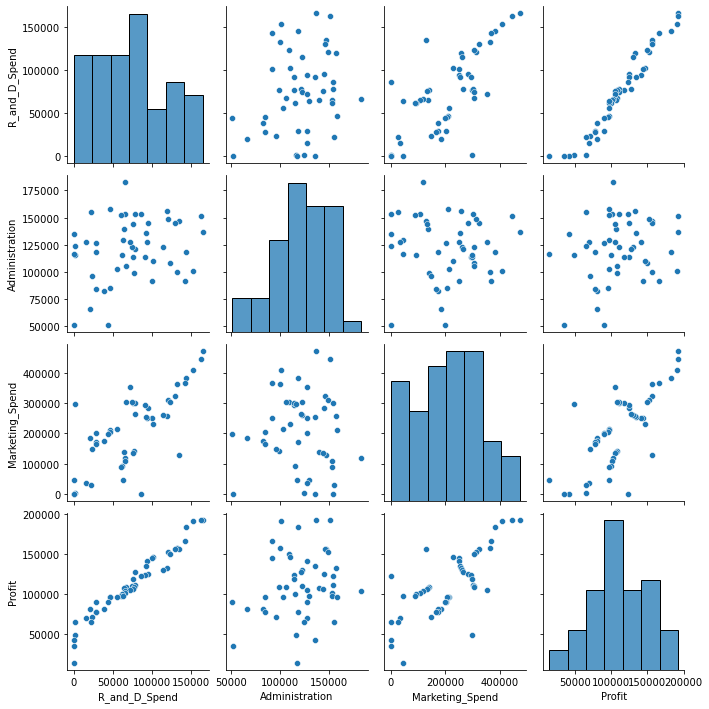

In [11]:
sns.pairplot(data1)

In [12]:
import statsmodels.formula.api as smf

In [13]:
model = smf.ols('Profit~R_and_D_Spend+Administration+Marketing_Spend', data = data1).fit()

In [14]:
model.params

Intercept          50122.192990
R_and_D_Spend          0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           4.53e-30
Time:                        15:55:44   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_and_D_Spend       0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Transform into logarithmic form
a = np.log10(data1['Marketing_Spend'])
b = np.log10(data1['R_and_D_Spend'])
c = np.log10(data1['Administration'])
d = data1['Profit']

C:\Users\91976\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
log_data1 = [ a, b, c, d]

In [18]:
df = pd.DataFrame(log_data1)

In [19]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Marketing_Spend,5.673743,5.647284,5.610590,5.583425,5.563681,5.559741,5.106248,5.510380,5.493616,5.484274,...,5.237533,5.216089,5.170265,4.550646,4.452319,3.279651,5.472924,-inf,-inf,4.654880e+00
R_and_D_Spend,5.218402,5.211114,5.185943,5.159484,5.152617,5.120169,5.129095,5.114938,5.081140,5.091086,...,4.458703,4.445494,4.373665,4.190492,4.345917,3.000100,3.119078,-inf,2.734039e+00,-inf
Administration,5.136396,5.180062,5.004947,5.074348,4.960907,4.999195,5.167904,5.162953,5.172366,5.036146,...,5.073887,4.927939,4.983128,5.105109,5.189788,5.093957,5.063769,5.131705e+00,4.713853e+00,5.068126e+00
Profit,192261.830000,191792.060000,191050.390000,182901.990000,166187.940000,156991.120000,156122.510000,155752.600000,152211.770000,149759.960000,...,78239.910000,77798.830000,71498.490000,69758.980000,65200.330000,64926.080000,49490.750000,4.255973e+04,3.567341e+04,1.468140e+04


In [20]:
df1 = pd.DataFrame.transpose(df)

In [21]:
df1

,Marketing_Spend,R_and_D_Spend,Administration,Profit
0,5.673743,5.218402,5.136396,192261.83
1,5.647284,5.211114,5.180062,191792.06
2,5.610590,5.185943,5.004947,191050.39
3,5.583425,5.159484,5.074348,182901.99
4,5.563681,5.152617,4.960907,166187.94
5,5.559741,5.120169,4.999195,156991.12
6,5.106248,5.129095,5.167904,156122.51
7,5.510380,5.114938,5.162953,155752.60
8,5.493616,5.081140,5.172366,152211.77
9,5.484274,5.091086,5.036146,149759.96


In [22]:
df2 = df1.drop([19,47,48,49], axis = 0)

In [23]:
df2

,Marketing_Spend,R_and_D_Spend,Administration,Profit
0,5.673743,5.218402,5.136396,192261.83
1,5.647284,5.211114,5.180062,191792.06
2,5.610590,5.185943,5.004947,191050.39
3,5.583425,5.159484,5.074348,182901.99
4,5.563681,5.152617,4.960907,166187.94
5,5.559741,5.120169,4.999195,156991.12
6,5.106248,5.129095,5.167904,156122.51
7,5.510380,5.114938,5.162953,155752.60
8,5.493616,5.081140,5.172366,152211.77
9,5.484274,5.091086,5.036146,149759.96


In [24]:
model1 = smf.ols('Profit~Administration+R_and_D_Spend+Marketing_Spend', data = df2).fit()

In [25]:
model1.params

Intercept         -328028.610134
Administration      24579.922149
R_and_D_Spend       54978.709875
Marketing_Spend     11073.789493
dtype: float64

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     22.53
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           7.50e-09
Time:                        15:58:16   Log-Likelihood:                -525.25
No. Observations:                  46   AIC:                             1059.
Df Residuals:                      42   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -3.28e+05   1.81e+05     -1.809      0.078   -6.94e+05    3.79e+04
Administration   2.458e+04   3.41e+04      0.722      0.474   -4.41e+04    9.33e+04
R_and_D_Spend    5.498e+04   1.05e+04      5.215      0.000    3.37e+04    7.63e+04
Marketing_Spend  1.107e+04   1.18e+04      0.941      0.352   -1.27e+04    3.48e+04
==============================================================================
Omnibus:                       11.369   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.469
Skew:                           1.185   Prob(JB):                      0.00323
Kurtosis:                       3.604   Cond. No.                         477.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""